In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy import stats
%matplotlib inline

## 1. Read in an Image

In [2]:
img_path = "../dataset_imgs/solidWhiteCurve.jpg"

In [3]:
image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

(540, 960, 3)


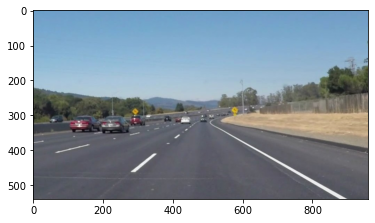

In [4]:
print(image.shape)
plt.imshow(image);

## 2. Convert image to grayscale

In [5]:
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

(540, 960)


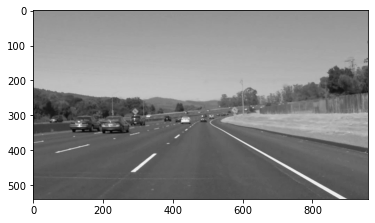

In [6]:
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray');

## 3. Reduce noise

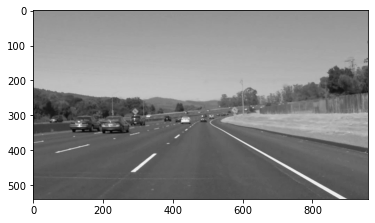

In [7]:
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
plt.imshow(img_gray, cmap='gray');

## 4. Detect edges

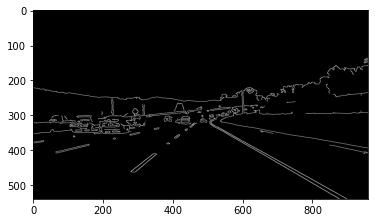

In [8]:
img_edge = cv2.Canny(img_blur, threshold1=50, threshold2=150)
plt.imshow(img_edge, cmap='gray');

## 5. Generate Region of Interest mask

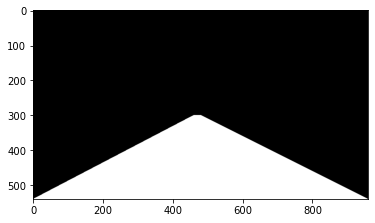

In [9]:
height   = img_edge.shape[0]
width    = img_edge.shape[1]
polygon   = np.array([(0,height), (460,300), (480,300), (width,height)])
mask     = np.zeros_like(img_edge)
cv2.fillPoly(mask, [polygon], 255)

plt.imshow(mask, cmap='gray');

## 6. Bitwise "and" of EDGES + MASK

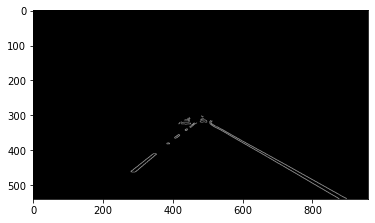

In [10]:
road_edges = cv2.bitwise_and(img_edge, mask)

plt.imshow(road_edges, cmap='gray');

## 7. Finding lines: Hough transform

In [34]:
lines = cv2.HoughLinesP(
         image         = road_edges,   # Input image
         lines         = np.array([]), # Output vector of lines
         rho           = 1, #2,        # Distance resolution
         theta         = np.pi/180,    # Angle resolution
         threshold     = 40, # 45, 100 # Min intersections
         minLineLength = 1, #40,       # Minimum line length
         maxLineGap    = 100)  # 5     # Max gap between line points

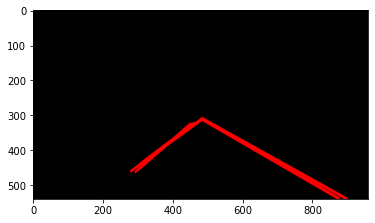

In [41]:
line_image = np.zeros_like(image)
for line in lines:
    #x1, x2, y1, y2 = line.reshape(4)
    x1, y1, x2, y2 = line.reshape(4)
    cv2.line(line_image, (x1, y1), (x2, y2), color=(255,0,0), thickness=5)
    
plt.imshow(line_image);

## 8. Average the lines
The goal is to have only 2 lines. Note if the slope is negative corresponds to the left side, and a positive slope corresponds to the right side.

## 9. Image + Lines

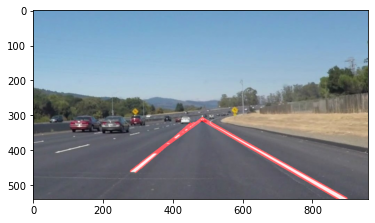

In [37]:
image_with_lines = cv2.addWeighted(line_image, 0.8, image, 1, 1)

plt.imshow(image_with_lines);